In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [3]:
df=pd.read_csv("quikr_car.csv")
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [4]:
df.shape

(892, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [6]:
# Copy

df_copy=df.copy()

## Qualtiy issues

- names are inconsistent
- some names are spam like 'Maruti Ertiga showroom condition with' and 'Well mentained Tata Sumo'
- company: many of the names are not of any company like 'Used', 'URJENT', and so on.
- year : is in object, change to INT
- year : has many non year values
- price : Column name capital first letter, change to Lowercase
- price : has commas, remove commas
- price : has ask for price, remove it
- price : is object. convert to INT
- kms_driven : has comma, remove it
- kms_driven : has kms, split it and remove "KMS"
- kms_driven : is object, convert to int
- kms_driven : has nan values, replace it
- fuel_type : has nan values, replace it

In [7]:
df["kms_driven"].value_counts()

kms_driven
45,000 kms    30
35,000 kms    30
55,000 kms    25
50,000 kms    23
20,000 kms    22
              ..
60,123 kms     1
1,625 kms      1
33,400 kms     1
2,450 kms      1
13,900 kms     1
Name: count, Length: 258, dtype: int64

# Cleaning Data

In [8]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


### names are inconsistent, keeping only the first 3 words

In [9]:
df["name"]=df["name"].str.split(" ").str.slice(0,3).str.join(" ")

### year has many non-year values

In [10]:
df=df[df["year"].str.isnumeric()]

### year : is in object, change to INT

In [11]:
df['year']=df['year'].astype(int)

### price : Column name capital first letter, change to Lowercase

In [12]:
df=df.rename(columns={"Price":"price"})

### price : has commas, remove commas

In [13]:
df["price"]=df["price"].str.replace(",","")

### price : has ask for price, remove it


In [14]:
df=df[df["price"].str.isnumeric()]

### price : is object. convert to INT

In [15]:
df['price']=df['price'].astype(int)

### kms_driven : has comma, remove it

In [16]:
df["kms_driven"]=df["kms_driven"].str.replace(",","")

### kms_driven : has kms, split it and remove "KMS"

In [17]:
df["kms_driven"]=df["kms_driven"].str.split(" ").str[0]

### kms_driven : has "PETROL" in it remove it.

In [18]:
df=df[df["kms_driven"].str.isnumeric()]

### kms_driven : is object, convert to int

In [19]:
df['kms_driven']=df['kms_driven'].astype(int)

### fuel_type : has nan values, replace it

In [20]:
df=df[~df['fuel_type'].isna()]

In [21]:
df['fuel_type'].isna().sum()

np.int64(0)

### Resetting Index

In [22]:
df.reset_index(drop=True)

,name,company,year,price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


# Cleaned Data

In [23]:
df.head()

,name,company,year,price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel


In [24]:
df.to_csv("Cleaned_Car_Data.csv")

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 816 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int64 
 3   price       816 non-null    int64 
 4   kms_driven  816 non-null    int64 
 5   fuel_type   816 non-null    object
dtypes: int64(3), object(3)
memory usage: 44.6+ KB


In [26]:
df.describe(include="all")

,name,company,year,price,kms_driven,fuel_type
count,816,816,816.000000,8.160000e+02,816.000000,816
unique,254,25,NaN,NaN,NaN,3
top,Maruti Suzuki Swift,Maruti,NaN,NaN,NaN,Petrol
freq,51,221,NaN,NaN,NaN,428
mean,NaN,NaN,2012.444853,4.117176e+05,46275.531863,NaN
std,NaN,NaN,4.002992,4.751844e+05,34297.428044,NaN
min,NaN,NaN,1995.000000,3.000000e+04,0.000000,NaN
25%,NaN,NaN,2010.000000,1.750000e+05,27000.000000,NaN
50%,NaN,NaN,2013.000000,2.999990e+05,41000.000000,NaN
75%,NaN,NaN,2015.000000,4.912500e+05,56818.500000,NaN


### The maximum price exceeds 8500000, which does not seem right so we'll drop it

In [27]:
df=df[df["price"]<6000000]

### Checking relationship of Company with Price

In [28]:
df["company"].unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

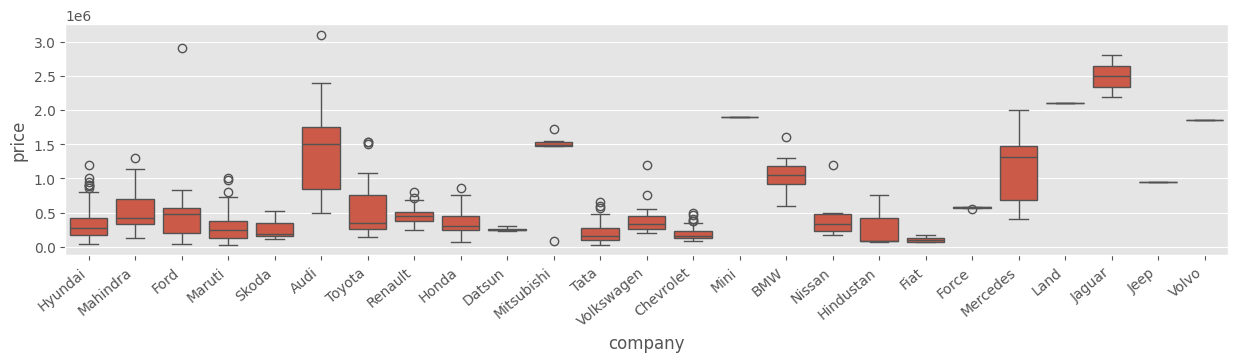

In [29]:
plt.subplots(figsize=(15,3))
ax=sns.boxplot(x="company",y="price",data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

### Checking relationship of Year with Price

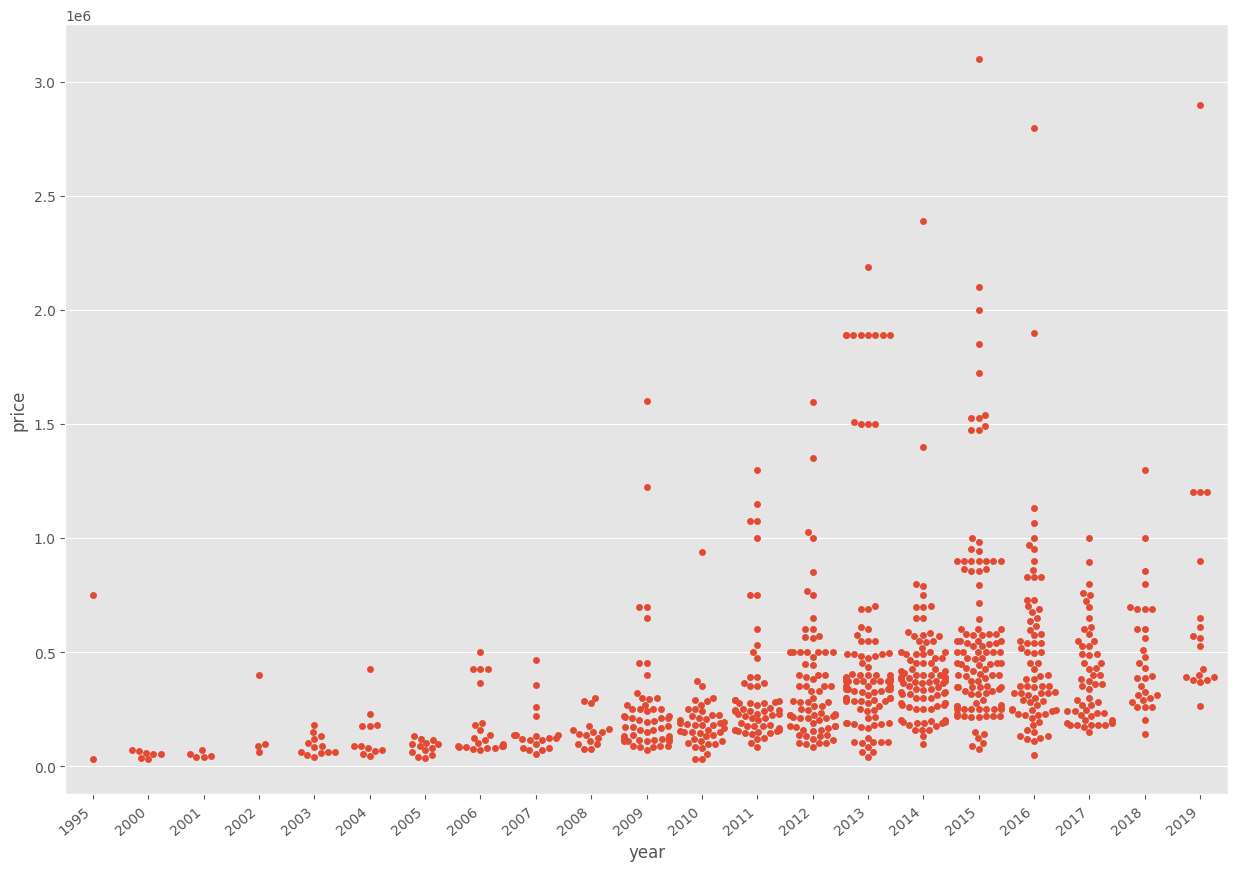

In [30]:
plt.subplots(figsize=(15,10))
ax=sns.swarmplot(x="year",y="price",data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

### Checking relationship of kms_driven with Price


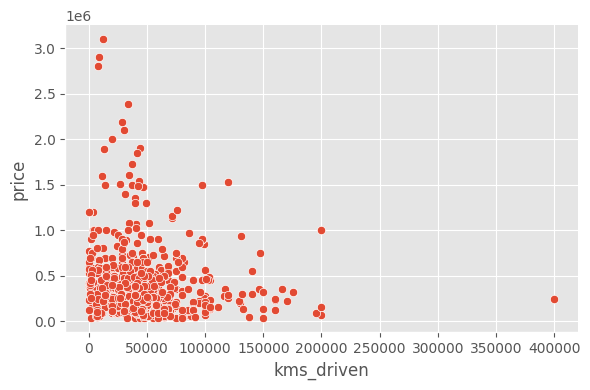

In [31]:
sns.relplot(x="kms_driven",y="price",data=df,height=4,aspect=1.5)

### Checking relationship of Fuel Type with Price

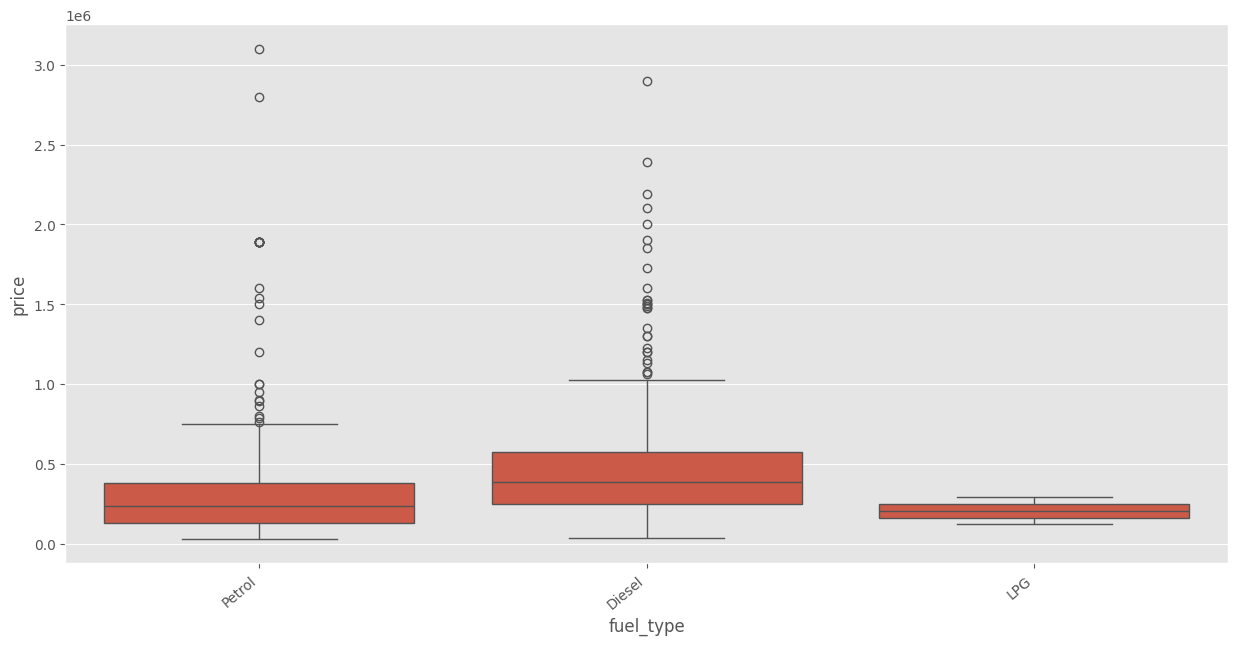

In [32]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x="fuel_type",y="price",data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

### Relationship of Price with FuelType, Year and Company mixed

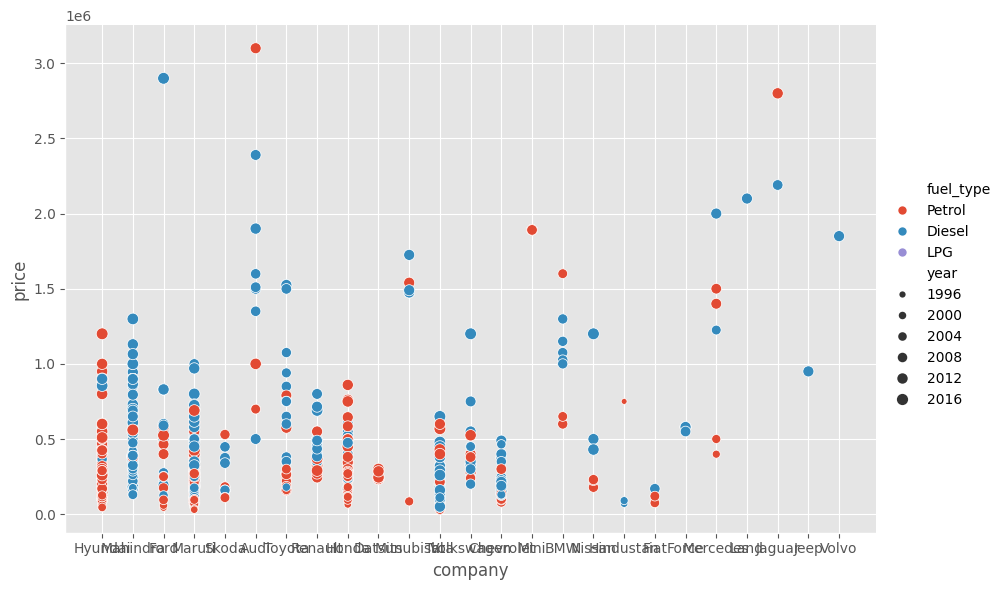

In [33]:
sns.relplot(x="company",y="price",hue="fuel_type",size="year",data=df,height=6,aspect=1.5)
plt.show()

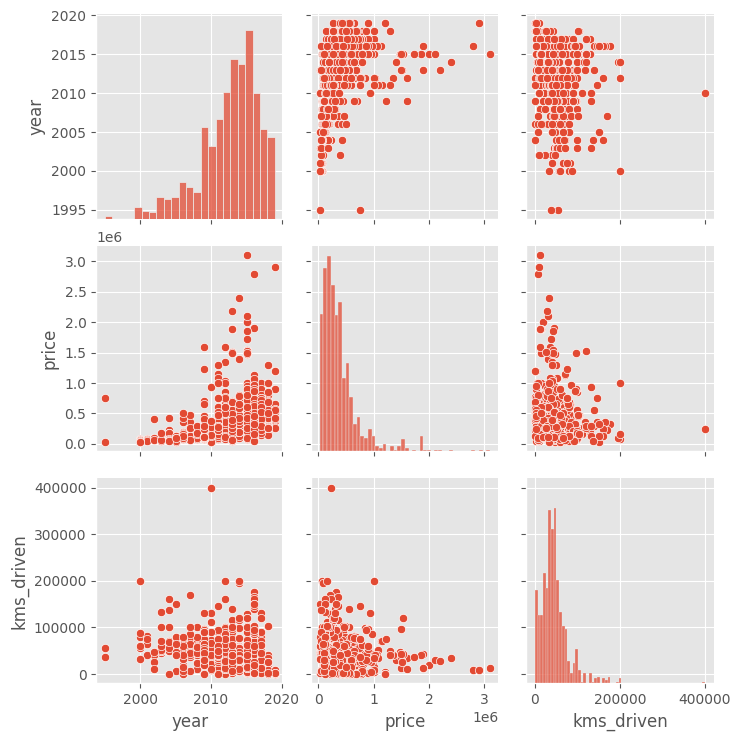

In [34]:
sns.pairplot(data=df)

<Axes: >

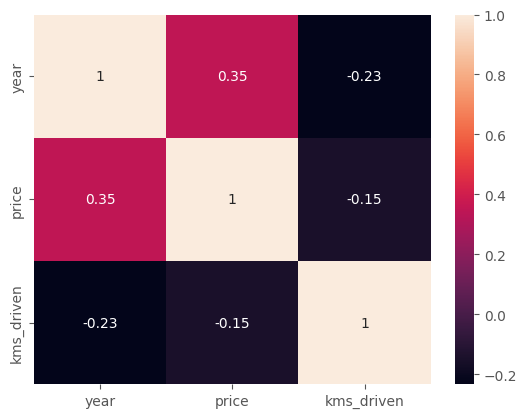

In [35]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

### There is a strong negative correlation between year and kms_driven

# Define numeric and categorical features

In [36]:
num_features=[num for num in df.columns if df[num].dtype != "object"]
cat_features=[num for num in df.columns if df[num].dtype == "object"]

In [37]:
num_features

['year', 'price', 'kms_driven']